In [1]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns



In [2]:
train_data=pd.read_csv("/content/SalaryData_Train.csv")
test_data=pd.read_csv("/content/SalaryData_Test (1).csv")   #importing test and train data

In [3]:
train_data.head()

age          workclass   education  ...  hoursperweek          native  Salary
0   39          State-gov   Bachelors  ...            40   United-States   <=50K
1   50   Self-emp-not-inc   Bachelors  ...            13   United-States   <=50K
2   38            Private     HS-grad  ...            40   United-States   <=50K
3   53            Private        11th  ...            40   United-States   <=50K
4   28            Private   Bachelors  ...            40            Cuba   <=50K

[5 rows x 14 columns]

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


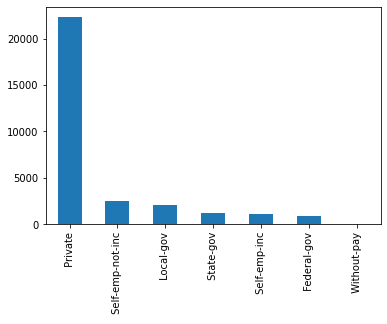

In [7]:

train_data["workclass"].value_counts().plot.bar()   #we have 4 workclass in which count of private is highest
     
    

 

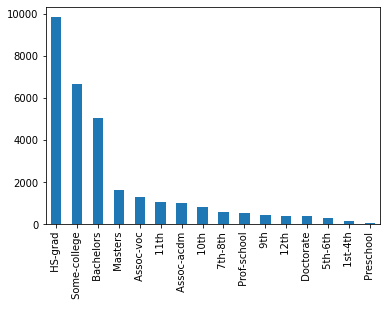

In [8]:
train_data["education"].value_counts().plot.bar()    #in train data quantity of high school graduate is highest 

In [9]:

train_data['maritalstatus'].value_counts().plot.bar()   #we have four types of marital status 

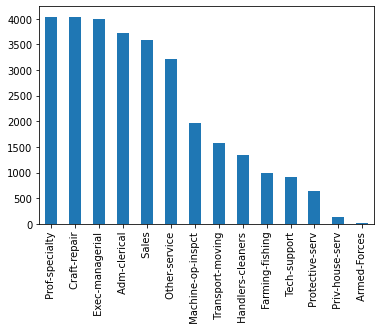

In [10]:
train_data['occupation'].value_counts().plot.bar()   #in train data set count of prof,craft-repairs,and exec-managerial is alomost same



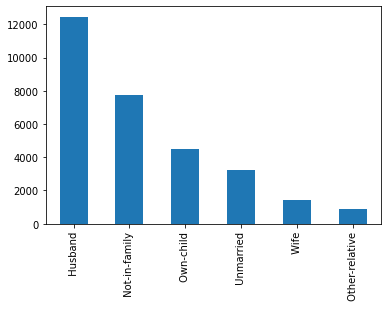

In [12]:
train_data['relationship'].value_counts().plot.bar()

In [15]:
train_data['race'].value_counts().plot.bar()   #Most of data belongs to white race 

In [16]:
train_data['sex'].value_counts().plot.bar()    #count of male salary higher than female

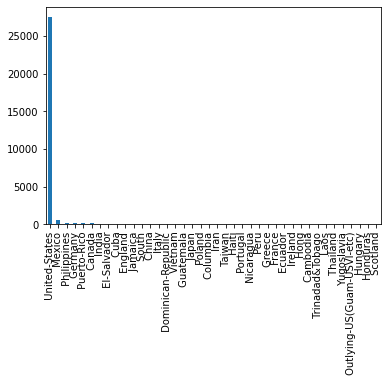

In [14]:
train_data['native'].value_counts().plot.bar()    #Almost all salaries are from united states

# **Converting data set into numeric form**

In [17]:

string_columns=['workclass','education','maritalstatus','occupation','relationship','race','sex','native']
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
for i in string_columns:
    train_data[i]=label_encoder.fit_transform(train_data[i])
    test_data[i]=label_encoder.fit_transform(test_data[i])


In [18]:
train_data.head()

age  workclass  education  ...  hoursperweek  native  Salary
0   39          5          9  ...            40      37   <=50K
1   50          4          9  ...            13      37   <=50K
2   38          2         11  ...            40      37   <=50K
3   53          2          1  ...            40      37   <=50K
4   28          2          9  ...            40       4   <=50K

[5 rows x 14 columns]

In [19]:
test_data.head()

age  workclass  education  ...  hoursperweek  native  Salary
0   25          2          1  ...            40      37   <=50K
1   38          2         11  ...            50      37   <=50K
2   28          1          7  ...            40      37    >50K
3   44          2         15  ...            40      37    >50K
4   34          2          0  ...            30      37   <=50K

[5 rows x 14 columns]

In [21]:
test_data.head()

age  workclass  education  ...  hoursperweek  native  Salary
0   25          2          1  ...            40      37   <=50K
1   38          2         11  ...            50      37   <=50K
2   28          1          7  ...            40      37    >50K
3   44          2         15  ...            40      37    >50K
4   34          2          0  ...            30      37   <=50K

[5 rows x 14 columns]

In [22]:
x_train=train_data.iloc[:,:-1]
y_train=train_data["Salary"]
x_test=test_data.iloc[:,:-1]
y_test=test_data["Salary"]

# **Multinomial Naive Bayes**

In [23]:

from sklearn.naive_bayes import MultinomialNB as MB


# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(x_train,y_train)
train_pred_m = classifier_mb.predict(x_train)
accuracy_train_m = np.mean(train_pred_m==y_train)
accuracy_train_m


0.7729186698053778

In [24]:
test_pred_m = classifier_mb.predict(x_test)
accuracy_test_m = np.mean(test_pred_m==y_test)
accuracy_test_m

0.7749667994687915

# **Gaussian naive bayes**

In [25]:
#for gaussian naive bayes
from sklearn.naive_bayes import GaussianNB as GB

Gmodel=GB()
Gmodel.fit(x_train,y_train)
predict=Gmodel.predict(x_train)
accurancy=np.mean(predict==y_train)
accurancy

0.7953317197705646

In [28]:
predict_test=Gmodel.predict(x_test)
accurancy_test=np.mean(predict_test==y_test)
accurancy_test

0.7946879150066402

Gaussian NB giving more accurancy for both test and train data rather than Multinomial NB